In [6]:
import pandas as pd
import numpy as np
import os
import cv2
from tqdm import tqdm
from sklearn.model_selection import train_test_split
import torch
from torch.utils.data import DataLoader
from torchvision import transforms
import torchvision
from torchvision.transforms import v2
from dataset import DogsCats
import yaml
from matplotlib import pyplot as plt


In [13]:
data_path = 'dataset/DogsCats/'

In [15]:
#get the names of all the files inside train data directory
filenames = os.listdir(data_path + "train")

#split the data into train and validation
train_filenames, val_filenames = train_test_split(filenames, test_size=0.2)

#make new directories inside train and validation for cats and dogs
os.makedirs(data_path + "train/0")
os.makedirs(data_path + "train/1")
os.makedirs(data_path + "val/0")
os.makedirs(data_path + "val/1")

In [16]:
#transfer the cat and dog images into their respective directories
for filename in tqdm(train_filenames):
    if filename.split(".")[0] == "cat":
        os.rename(data_path + "train/" + filename, data_path + "train/0/" + filename)
    else:
        os.rename(data_path + "train/" + filename, data_path + "train/1/" + filename)

100%|██████████| 20000/20000 [00:02<00:00, 7249.10it/s]


In [17]:
for filename in tqdm(val_filenames):
    if filename.split(".")[0] == "cat":
        os.rename(data_path + "train/" + filename, data_path + "val/0/" + filename)
    else:
        os.rename(data_path + "train/" + filename, data_path + "val/1/" + filename)

100%|██████████| 5000/5000 [00:00<00:00, 5109.27it/s]


In [4]:
config = yaml.load(open('config.yaml', 'r'), Loader=yaml.FullLoader)

BATCH_SIZE = int(config["BATCH_SIZE"])


IMAGE_SIZE = int(config["IMAGE_SIZE"])


In [5]:
train_transform = v2.Compose([
            v2.Normalize(mean=[0.485,0.456,0.406],std=[0.229,0.224,0.225]),
            v2.ToImage(),
            v2.ToDtype(torch.float),
            # v2.ElasticTransform(alpha=60),
            v2.RandomRotation(degrees=(-70, 70)),
            v2.RandomAffine(degrees=(-15, 15), translate=(0.25, 0.25), scale=(0.7, 1.3), shear=(-15, 15, -15, 15)),
            v2.RandomPerspective(distortion_scale=0.2, p=0.2),
            v2.RandomResizedCrop((IMAGE_SIZE, IMAGE_SIZE), scale=(0.7, 1.4), antialias=True),
            v2.ColorJitter(brightness=0.2, contrast=0.2, saturation=0.2),
            v2.GaussianBlur(kernel_size=3, sigma=(0.1, 1.0)),
            v2.RandomAutocontrast(p=0.2),
            v2.RandomEqualize(p=0.2),
        ])

val_transform = transforms.Compose([
        v2.Normalize(mean=[0.485,0.456,0.406],std=[0.229,0.224,0.225]),
        v2.ToImage(),
        v2.ToDtype(torch.float),
        v2.Resize((IMAGE_SIZE, IMAGE_SIZE), antialias=True),
    ])

train_dataset = DogsCats(root_dir='dataset/DogsCats/train/',
                                    transform=train_transform)

test_dataset = DogsCats(root_dir='dataset/DogsCats/val/', 
                                        transform=val_transform)

train_loader = DataLoader(train_dataset, batch_size=BATCH_SIZE, shuffle=True, num_workers=8)
test_loader = DataLoader(test_dataset, batch_size=BATCH_SIZE, shuffle=False, num_workers=8)

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


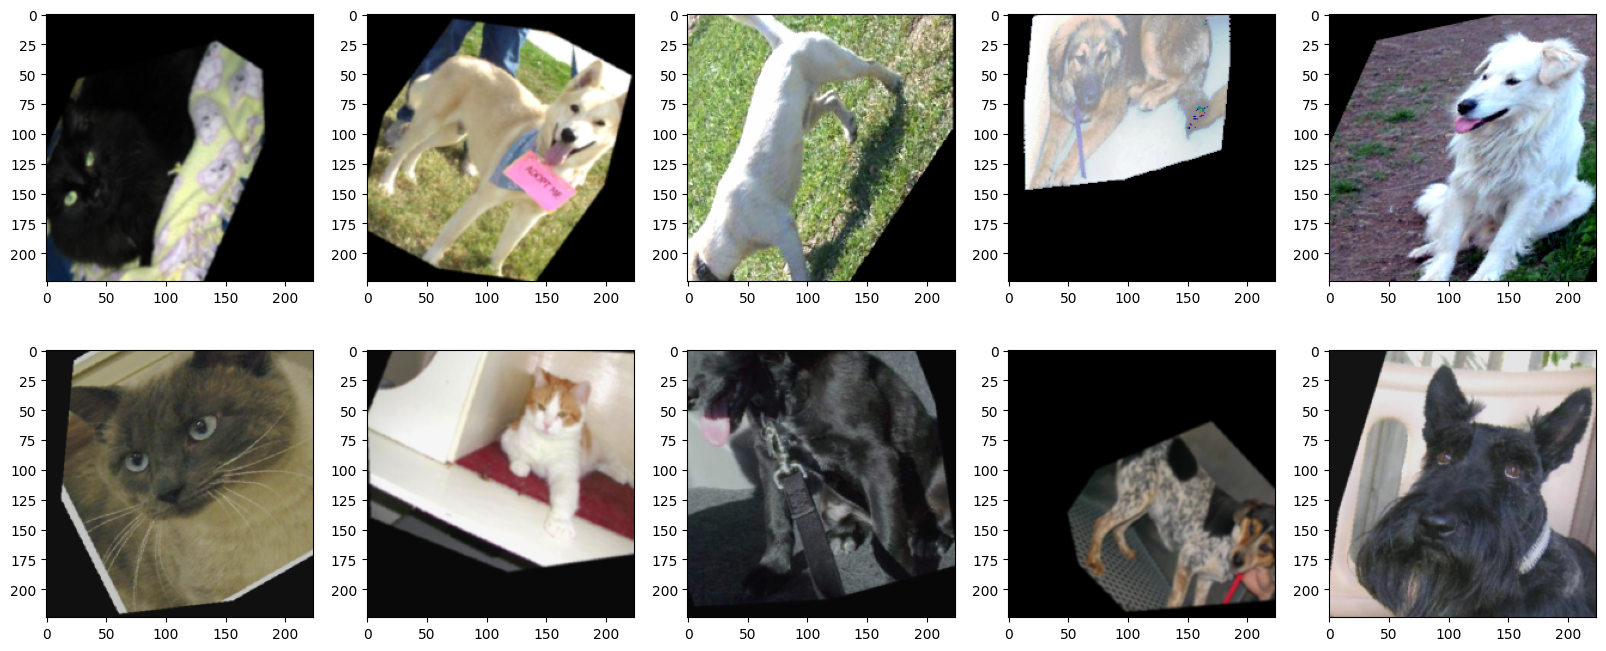

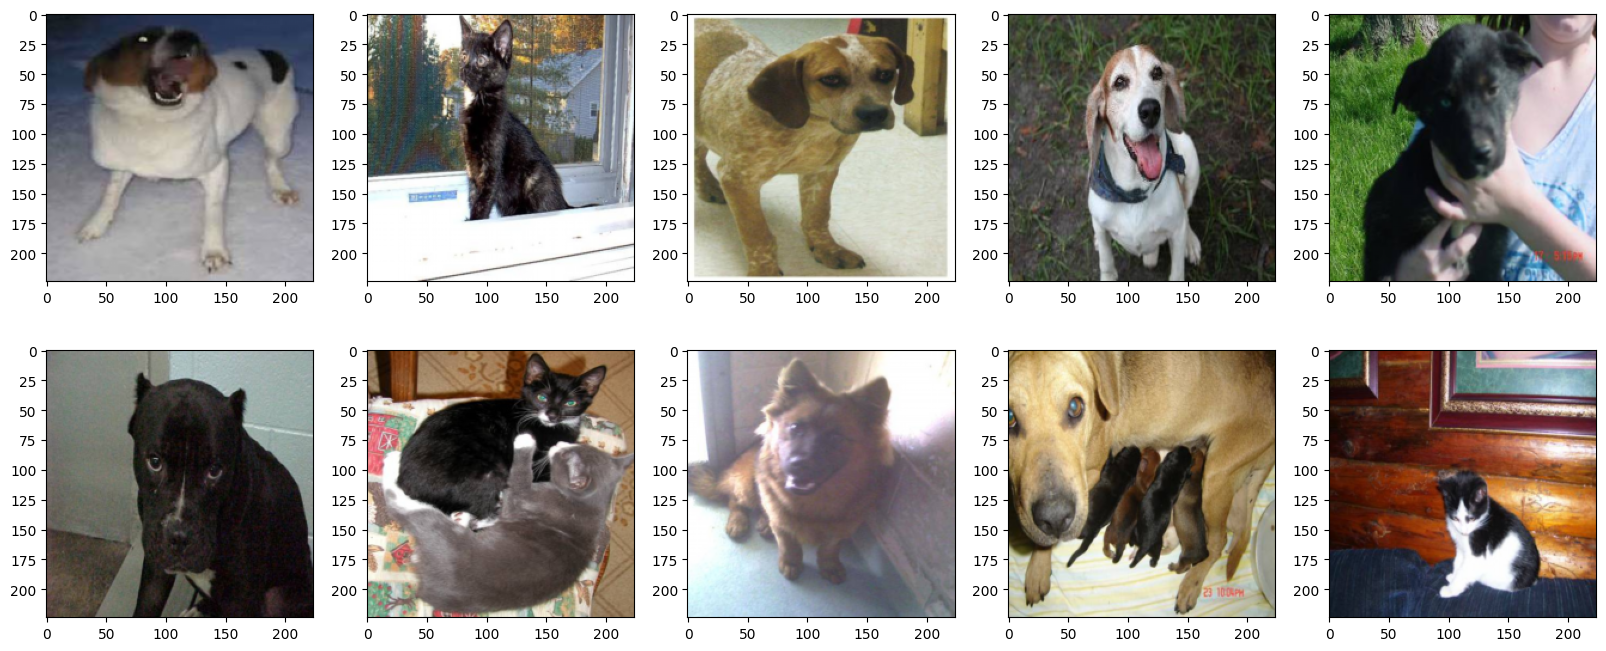

In [17]:
fig = plt.figure(figsize=(20,8))
for i in range(10):
    idx = torch.randint(len(train_dataset),(1,)).item()
    img = train_dataset[idx][0]
    img = img.permute(1,2,0)
    fig.add_subplot(2,5,i+1)
    plt.imshow(img.squeeze(),cmap='gray')

fig = plt.figure(figsize=(20,8))
for i in range(10):
    idx = torch.randint(len(test_dataset),(1,)).item()
    img = test_dataset[idx][0]
    img = img.permute(1,2,0)
    fig.add_subplot(2,5,i+1)
    plt.imshow(img.squeeze(),cmap='gray')
plt.show()
